In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Dados coletados
data = pd.read_csv("C:/Users/guisb/Documents/analise_unidades/hidv/records_failure_in_days_hidv.csv")

In [7]:
# Analisando o DF dos dados coletados
data.head()

,Tipo do Equipamento,Número de Registro/TAG,Registro_falha_1,Registro_falha_2,Registro_falha_3,Registro_falha_4,Registro_falha_5,Registro_falha_6,Registro_falha_7,Registro_falha_8,Registro_falha_9,Registro_falha_10,Registro_falha_11,Registro_falha_12,Registro_falha_13,Registro_falha_14,Registro_falha_15,Registro_falha_16,Registro_falha_17,Registro_falha_18
0,Fancoil,FANCOIL - ICV-E4 - TRANE,210,235,260,285,238,247,268,274,280,287,293,299,305,312,275,296,263,285
1,Fancoil,FANCOIL - ICV-E5 - TRANE,215,248,281,260,257,249,269,274,279,284,289,294,299,304,309,315,269,284
2,Fancoil,FANCOIL - ICV-E6 - TRANE,190,205,220,235,228,247,258,268,279,289,300,310,321,305,288,315,296,288
3,Fancoil,FANCOIL - ICV-E7 - TRANE,195,215,235,255,275,263,294,309,325,280,331,344,356,296,285,279,315,310
4,Fancoil,FANCOIL - ICV-E8 - TRANE,216,204,192,180,196,178,172,165,159,152,146,139,160,155,178,149,153,180


In [5]:
# isolando as linhas para avaliarmos exclusivamente o fancoil 1
falhas_fancoil_1 = data.iloc[0, 2:].values

In [6]:
# garantindo que os dados selecionados estejam em formato númerico
falhas_fancoil_1 = falhas_fancoil_1.astype(float)

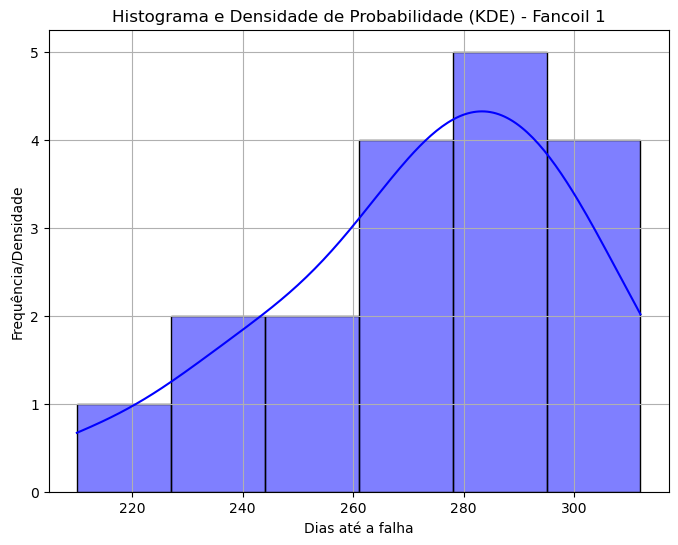

In [8]:
# plotando os valores para analisar qual o tipo de distribuição os dados coletados segue
plt.figure(figsize = (8,6))
sns.histplot(falhas_fancoil_1, kde=True, bins=6, color='blue')
plt.title('Histograma e Densidade de Probabilidade (KDE) - Fancoil 1')
plt.xlabel('Dias até a falha')
plt.ylabel('Frequência/Densidade')
plt.grid(True)
plt.show()

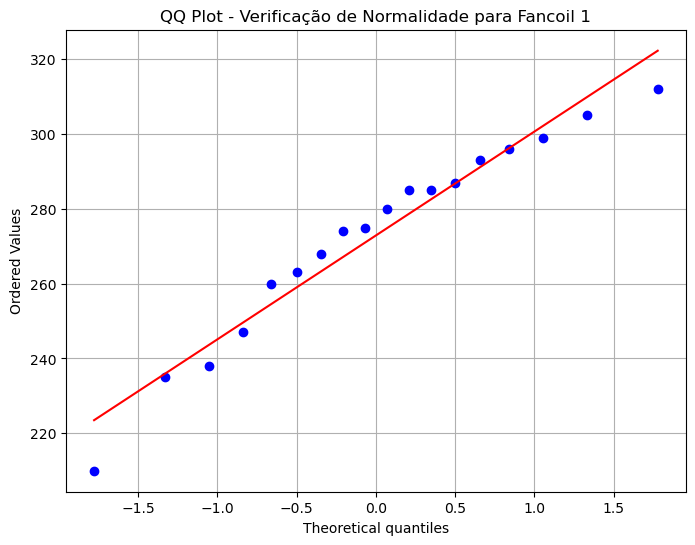

In [10]:
# Criando um QQ-plot para validar se é possível considerar que os dados seguem uma distribuição do tipo normal
plt.figure(figsize=(8, 6))
stats.probplot(falhas_fancoil_1, dist="norm", plot=plt)
plt.title("QQ Plot - Verificação de Normalidade para Fancoil 1")
plt.grid(True)
plt.show()

In [11]:
# Aplicando o teste de Shapiro-Wilk para verificar a normalidade dos dados
stat, p = stats.shapiro(falhas_fancoil_1)

In [12]:
# Exibir o resultado do teste
stat, p

(0.953212320804596, 0.4776059687137604)

In [13]:
# Calculo da média e o desvio padrão dos dados
mean = np.mean(falhas_fancoil_1)
std_dev = np.std(falhas_fancoil_1)

In [14]:
# Gerando os valores de X para a PDF
x_vals = np.linspace(min(falhas_fancoil_1) - 5, max(falhas_fancoil_1) + 5, 1000)

In [15]:
# Calculando a PDF da distribuição normal com os parâmetros estimados
pdf_vals = stats.norm.pdf(x_vals, loc=mean, scale=std_dev)

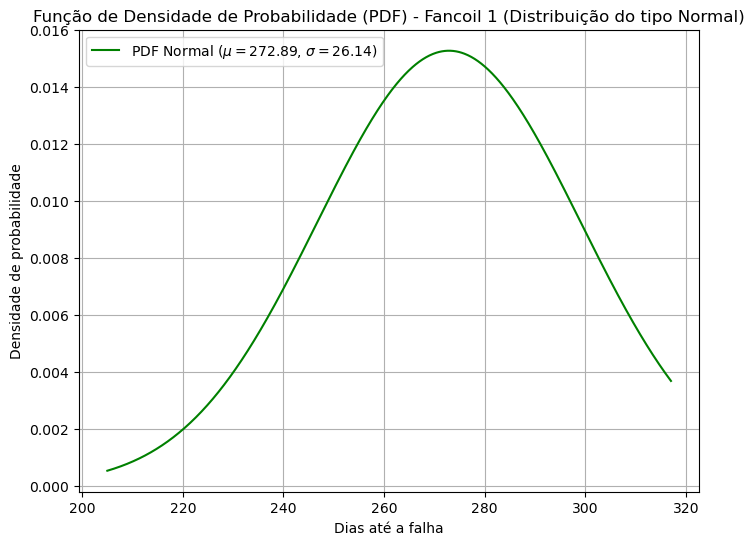

In [16]:
# Plotando o gráfico da PDF
plt.figure(figsize=(8, 6))
plt.plot(x_vals, pdf_vals, color='green', label=f'PDF Normal ($\mu={mean:.2f}$, $\sigma={std_dev:.2f}$)')
plt.title('Função de Densidade de Probabilidade (PDF) - Fancoil 1 (Distribuição do tipo Normal)')
plt.xlabel('Dias até a falha')
plt.ylabel('Densidade de probabilidade')
plt.grid(True)
plt.legend()
plt.show()

In [17]:
# Calculando a CDF
cdf_vals = stats.norm.cdf(x_vals, loc=mean, scale=std_dev)

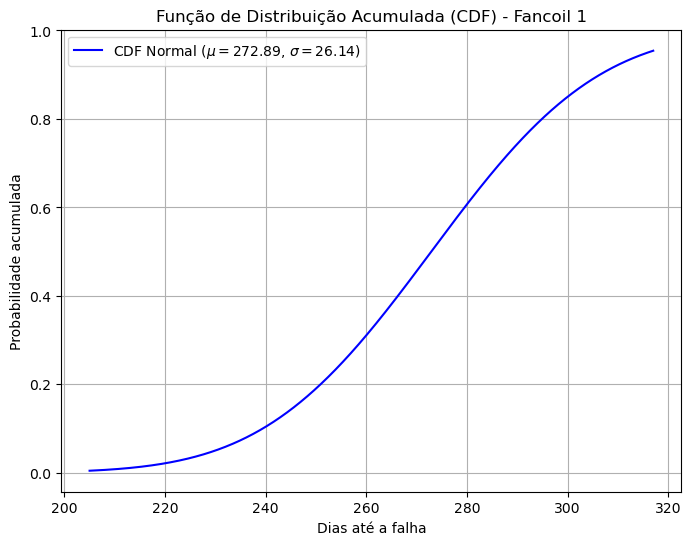

In [18]:
# Plotar a CDF
plt.figure(figsize=(8, 6))
plt.plot(x_vals, cdf_vals, color='blue', label=f'CDF Normal ($\mu={mean:.2f}$, $\sigma={std_dev:.2f}$)')
plt.title('Função de Distribuição Acumulada (CDF) - Fancoil 1')
plt.xlabel('Dias até a falha')
plt.ylabel('Probabilidade acumulada')
plt.grid(True)
plt.legend()
plt.show()

In [19]:
# Valindando o gráfico da CDF com a definição de um intervalo (exemplo: entre 250 e 270 dias)
intervalo_inicio = 250
intervalo_fim = 270

In [20]:
# Cálculo da Probabilidade no intervalo de 250 e 270 dias
probabilidade = stats.norm.cdf(intervalo_fim, loc=mean, scale=std_dev) - stats.norm.cdf(intervalo_inicio, loc=mean, scale=std_dev)

print(f'Probabilidade de falha entre {intervalo_inicio} e {intervalo_fim} dias: {probabilidade:.4f} ou seja {round(probabilidade,3) * 100}%')


Probabilidade de falha entre 250 e 270 dias: 0.2654 ou seja 26.5%
